# Neural Networks Lab

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.activations import relu
from keras.activations import softmax

np.random.seed(0)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Loading MNIST Dataset

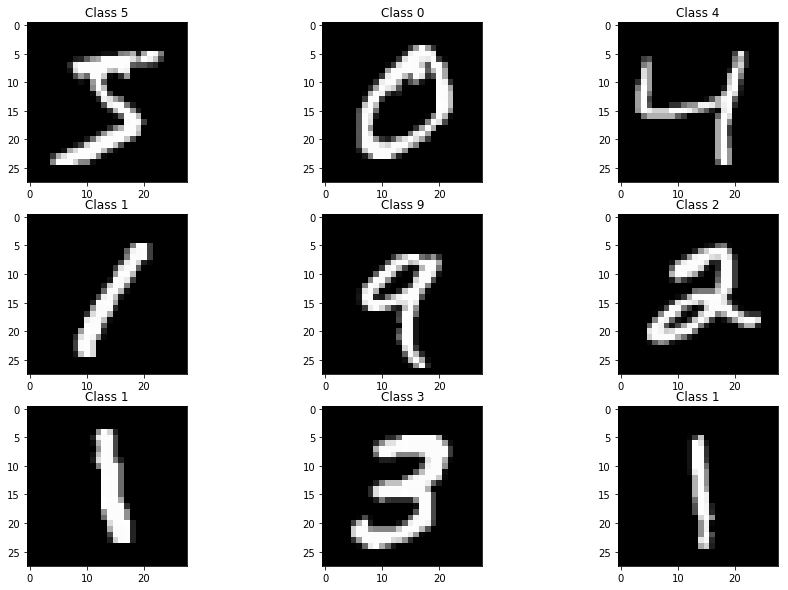

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(15,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
plt.show()

In [19]:
def show_img(img, label):
    img = img.reshape(28,28)
    
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    
    if type(label) == np.uint8:
        zeros = np.zeros(10)
        zeros[label] = 1
        label = zeros
    
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(10), label, tick_label=np.arange(10))
    plt.show()

## Show Image

In [20]:
X = x_train; Y = y_train
zeros = np.zeros(10); zeros[Y] = 1
Y = zeros

In [5]:
X.shape

(60000, 28, 28)

In [6]:
Y.shape

(10,)

# Forward Pass for a single example

In [7]:
def relu(z):
    return z * (z > 0)

def d_relu(g):
    return g>0 

def d_softmax(Y_hat, Y):
    return Y_hat - Y

def softmax(z):
    # subracting the max adds numerical stability
    shiftx = z - np.max(z,axis=1)[:,np.newaxis]
    exps = np.exp(shiftx)
    return exps / np.sum(exps,axis=1)[:,np.newaxis]

### Initialize Weights

In [8]:
W1 = np.random.randn(784, 10)
W2 = np.random.randn(10, 1)

In [11]:
X.shape

(60000, 784)

In [12]:
X = X.reshape(60000,784)

### First Layer Activations

In [14]:
Z1 = np.dot(X, W1)# multiply input with weights

#Layer 1
L1 = relu(Z1) # activation

X2 = L1  # activation function of Z1

### Second Layer Activations

In [15]:
Z2 = np.dot(X2, W2) #multiplying later 2 

#technically should be our y-hat

### Softmax Equation

In [28]:
y_hat = softmax(Z2) 

# Backward pass for single example

In [34]:
cost = np.sum( - (Y * np.log(y_hat) + (1 - Y) * np.log(1 - y_hat)) )

dJ_dZ2 = d_softmax(y_hat,Y)                            

dJ_dtheta2 = np.dot(Z1.T, dJ_dZ2)                      # compute gradients
dJ_db2 = np.sum(dJ_dZ2, axis=0, keepdims=True)
dJ_dZ1 = np.dot(dJ_dZ2, W2) * d_relu(Z1)
dJ_db1 = np.sum(dJ_dZ1, axis=0, keepdims=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


# Define Neural Network Class

In [55]:
class NeuralNetwork:
    def __init__(self, num_hidden_nodes, num_classes, lr=0.001):
        # set learning rate
        self.lr = lr
        
        # init layer 1 weights
        self.W1 = np.random.randn(num_classes, num_hidden_nodes)
        self.b1 = np.zeros((1, num_classes))
        
        # init layer 2 weights
        self.W2 = np.random.randn(num_hidden_nodes, 1)
        self.b2 = np.zeros((1, num_hidden_nodes)) 
        
        # set activation function
        self.phi_1 = relu(self)
        self.phi_2 = softmax(self)
        
        # set derivative of activation functions
        self.d_phi_1 = d_relu(self)
        self.d_phi_2 = d_softmax(self)
        
    #def d_softmax(self, g):
        # derivative of softmax
        #return 
    
    #def softmax(self, z):
        # softmax
        #return 
    
    def sigmoid(self, x):
        1 / (1 + np.e ** -x)
        return 
    
    def d_sigmoid(self, x):
        # derivative of sigmoid
        sigmoid(x)*(1-sigmoid(x))
        return 

    def relu(self, z):
        return z * (z > 0)

    def d_relu(self, g):
        return g>0 

    def d_softmax(self,y_hat, Y):
        return y_hat - Y

    def softmax(self,z):
        # subracting the max adds numerical stability
        shiftx = z - np.max(z,axis=1)[:,np.newaxis]
        exps = np.exp(shiftx)
        return exps / np.sum(exps,axis=1)[:,np.newaxis]    

    
    def forward(self, X1):
        '''
        Forward pass through the network
        
        INPUT
            X: input to network
                shape: (?, 784)
        
        RETURN
            Y_hat: prediction from output of network 
                shape: (?, 10)
        '''
        l1 = relu(np.dot(X, theta_1) + b1)                     # l1 = X * theta_1
        y_hat = softmax(np.dot(l1, theta_2) + b2)              # Y_hat = l1 * theta_2 + b
        
        # store input for backward pass

        return self.y_hat
    
    def backward(self, y_hat, Y):
        '''
        Backward pass through network. Update parameters 
        
        INPUT
            Y_hat: Network predicted 
                shape: (?, 10)
            
            Y: Correct target
                shape: (?, 10)
            
        RETURN 
            cost: calculate J for errors 
                type: (float)
            
        '''
        cost = np.sum( - (Y * np.log(y_hat) + (1 - Y) * np.log(1 - y_hat)) )
        
        # dJ/dZ2 
        dJ_dZ2 = d_softmax(y_hat,Y) 
        
        # dJ/dW2 = dJ/dZ2 * dZ2/dW2
        dJ_dW2 = np.dot(Z1.T, dJ_dZ2)
        dJ_db2 = np.sum(dJ_dZ2, axis=0, keepdims=True)
        
        # dZ2/dX2 = dJ/dZ2 * dZ2/dX2
        dZ2_dX2 = dJ_dZ2 * dZ2_dX2

        # dX2/dZ1 = dZ2/dX2 * dX2/dZ1
        dX2_dZ1 = dZ2_dX2 * dX2_dZ1

        # dJ/dW1 = dJ/d * 
        dJ_dW1 = np.dot(X.T, dJ_DZ1)
        dJ_db1 = np.sum(dJ_dZ1, axis=0, keepdims=True)
        
        # perform weight updates
        self.W1 -= lr * dJ_dW1
        self.b1 -= lr * dJ_db1
        self.W2 -= lr * dJ_dW2 
        self.b2 -= lr * dJ_db2
        
        return cost

In [56]:
nn = NeuralNetwork(200,10,lr=.01)
num_train = float(len(x_train)); num_test = float(len(x_test))

for epoch in range(10):
    train_correct = 0; train_cost = 0
    # training loop
    for x,y in zip(x_train, y_train):
        # standardizing input to range 0 to 1
        X = x.reshape(1,784) /255.
        
        # forward pass through network
        Y_hat = nn.forward(X)

        # get pred number
        pred_num = np.argmax(Y_hat)
        
        # check if prediction was accurate
        if pred_num == y:
            train_correct += 1
            
        zeros = np.zeros(10); zeros[y] = 1
        Y = zeros
        
        # compute gradients and update weights
        train_cost += nn.backward(Y_hat, Y)
    
    test_correct = 0
    # validation loop
    for x,y in zip(x_test, y_test):
        # standardizing input to range 0 to 1
        X = x.reshape(1,784) /255.
        
        # forward pass
        y_hat = nn.forward(X)
        
        # get pred number
        pred_num = np.argmax(y_hat)
        
        # check if prediction was correct
        if pred_num == y:
            test_correct += 1
            
        # no backward pass here!
        
    # compute average metrics for train and test
    train_correct = round(100*(train_correct/num_train), 2)
    test_correct = round(100*(test_correct/num_test ), 2)
    train_cost = round( train_cost/num_train, 2)
    
    # print status message every epoch
    log_message = 'Epoch: {}, Train Accuracy: {}%, Train Cost: {}, Test Accuracy: {}%'.format(epoch, train_correct, train_cost, test_correct)
    print (log_message)

TypeError: '>' not supported between instances of 'NeuralNetwork' and 'int'

In [7]:
X = x_test[0].reshape(1,784)
Y_hat = nn.forward(X)[0]

show_img(X,Y_hat)

NameError: name 'nn' is not defined

# Keras

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#resized x_train data to make it two dimensional array

# build model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/step - loss: 8.3466 - acc: 0.4803 - val_loss: 6.5898 - val_acc: 0.5891
Epoch 2/10
60000/60000 [==============================] - 6s 95us/step - loss: 5.5513 - acc: 0.6544 - val_loss: 4.6491 - val_acc: 0.7104
Epoch 3/10
60000/60000 [==============================] - 4s 71us/step - loss: 4.7396 - acc: 0.7048 - val_loss: 4.5157 - val_acc: 0.7189
Epoch 4/10
60000/60000 [==============================] - 4s 68us/step - loss: 4.4167 - acc: 0.7251 - val_loss: 4.3490 - val_acc: 0.7297
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 4.3669 - acc: 0.7283 - val_loss: 4.1371 - val_acc: 0.7428
Epoch 6/10
60000/60000 [==============================] - 5s 76us/step - loss: 4.2460 - acc: 0.7358 - val_loss: 4.0746 - val_acc: 0.7468
Epoch 7/10
60000/60000 [==============================] - 5s 77us/step - loss: 4.1613 - acc: 0.7412 - val_loss: 4.0588 - val_acc

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 54us/step
Test accuracy: 0.7439


## Extra Credit

In [67]:
X = x_train; Y = y_train
zeros = np.zeros(10); zeros[Y] = 1
Y = zeros

X = X.reshape(60000,784)


In [68]:
W1 = np.random.randn(784, 20)
W2 = np.random.randn(20, 10)
W3 = np.random.randn(10, 1)

In [69]:
Z1 = np.dot(X, W1)# multiply input with weights

#Layer 1
L1 = relu(Z1) # activation

X2 = L1  # activation function of Z1

In [71]:
L1.shape, X.shape

((60000, 20), (60000, 784))

In [72]:
Z2 = np.dot(X2, W2) #multiplying later 2 

L2 = relu(Z2)

X3 = L2

#technically should be our y-hat

In [76]:
X3.shape, L2.shape

((60000, 10), (60000, 10))

In [77]:
Z3 = np.dot(X3,W3)

## Statement of Collaboration

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
https://keras.io/getting-started/sequential-model-guide/
https://www.tensorflow.org/tutorials/keras/basic_classification

I worked with Matt, Ryan, and Tucker